# Basic Python

In [59]:
# Defining a class
class Student:
    
    # Instance variables are added dynamically
    def __init__(self, lastName, firstName, UID):
        self.lastName = lastName
        self.firstName = firstName
        self.UID = UID
        self.classes = []
        
    # __str__ converts to a string
    # also define __repr__ for interactive display
    def __str__(self):
        return "%s, %s [%d]" % (self.lastName, self.firstName, self.UID)
        
    # add a course
    def addClass(self, newClass):
        self.classes.append(newClass)
        
    # Generator to iterate over all courses
    def allClasses(self):
        for nextClass in self.classes:
            yield nextClass
            
    # Alternate approach for iterating, return the iterator from
    # the list class
    def __iter__(self):
        return self.classes.__iter__()
            

# Create a student object
me = Student('Raymer', 'Michael', 12345)
me.addClass('CEG 3310')
me.addClass('CS 3100')

# Additional instance variables can be added from any context
me.gradStudent = False

# Show the class of an object
print("Class of the classes object:  " + me.classes.__class__.__name__ + "\n")

print(me)
for nextClass in me:
    print(nextClass)
        
    

Class of the classes object:  list

Raymer, Michael [12345]
CEG 3310
CS 3100


# Learning the Python Ecosystem
## Pandas
* Read a dataframe from a CSV file
* Show the data types and dimensions

## Numpy matrices
* Convert from dataframe to matrix
* Slicing a matrix

## SKlearn.cluster
* KMeans

## matplotlib.pyplot
* plot.scatter


Driver_ID             int64
Distance_Feature    float64
Speeding_Feature    float64
dtype: object
Dimensions: 2


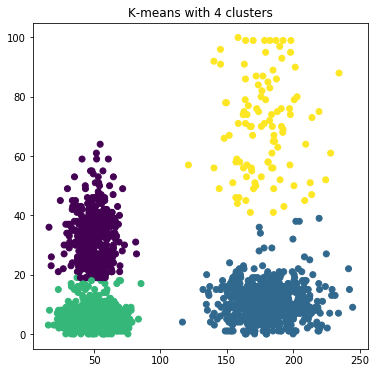

In [70]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

numClusters = 4

df = pd.read_csv('D:\Data\Devel\Python\Learning\data_1024.csv', '\t')
print(df.dtypes)
print("Dimensions: %d" % (df.ndim))

# Convert from Pandas dataframe to numpy.matrix
# Note that as_matrix acutally returns an array
# [:, 1:] = all rows, columns 1 & 2 (column 0 is the driver_id)
X=np.matrix(df.as_matrix()[:, 1:])
kmeans = KMeans(n_clusters=numClusters).fit_predict(X)

# Plot the results
plt.figure(figsize = (6, 6))
plt.scatter(df['Distance_Feature'], df['Speeding_Feature'], c=kmeans)
plt.title('K-means with %d clusters' % (numClusters))
plt.show()



# Kmeans clustering
* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

# Hierarchical clustering (UPGMA)
* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* http://people.revoledu.com/kardi/tutorial/Clustering/Linkages.htm#complete

[  58.  897.    0.    2.]


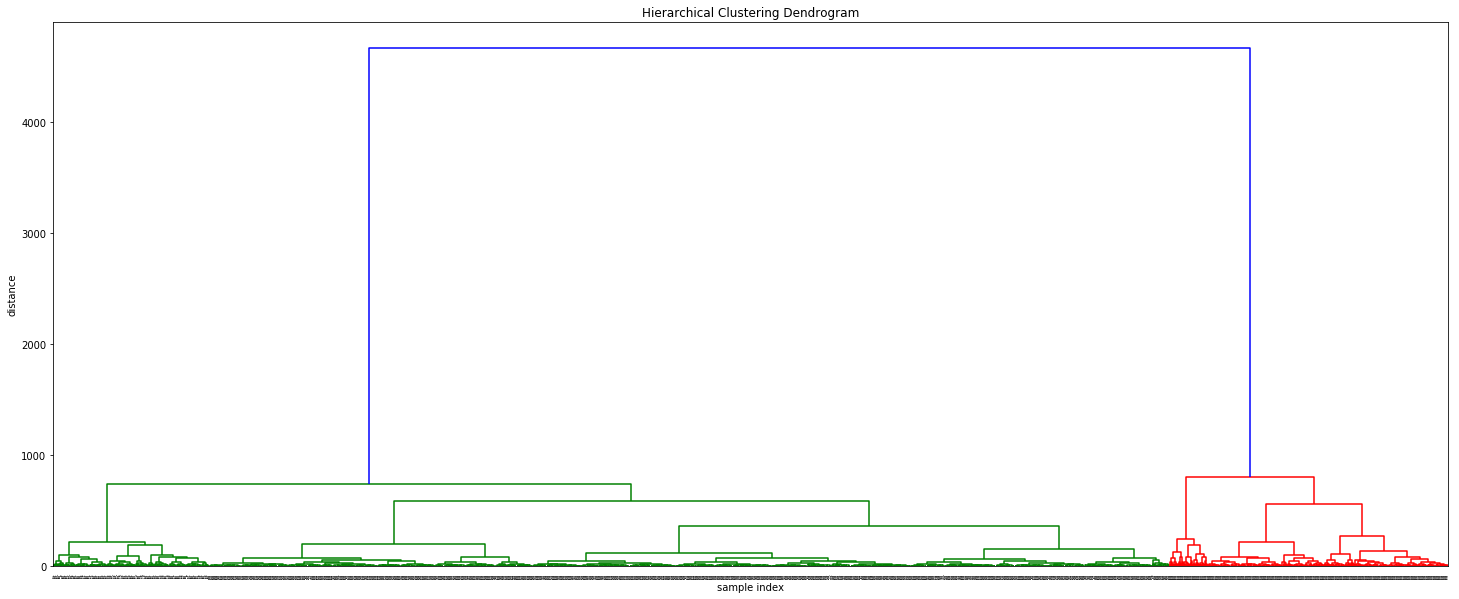

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'ward')
print(Z[0])

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=2.,  # font size for the x axis labels
)
plt.show()


# To Do:
* TensorFlow
* TensorBoard
* Keras
* Keras.js
* Caffe, _et al._